# Library

In [1079]:
# Libraries
# ---------------------------
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
# ---------------------------
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
# ---------------------------
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
# ---------------------------
from sklearn.model_selection import train_test_split
# ---------------------------
from sklearn.metrics import confusion_matrix
# ---------------------------
from collections import Counter
# ---------------------------
from sklearn.preprocessing import StandardScaler
# ---------------------------
from mlxtend.classifier import StackingClassifier # <-- note: this is not from sklearn!
# ---------------------------
from sklearn.metrics import accuracy_score
# ---------------------------
import xgboost as xgb
# ---------------------------
import imblearn.over_sampling
# ---------------------------
from sklearn import svm
# ---------------------------
from sklearn.metrics import roc_auc_score, roc_curve
# ---------------------------
sns.set_style("whitegrid")

In [1080]:
df_pok = pd.read_csv('C:/Users/hanan/Dropbox/USA/T5/project - 3/data/pokemon.csv')

In [1081]:
x = df_pok[['attack','defense','weight_kg','hp','height_m','sp_attack','sp_defense','speed']]
y = df_pok['is_legendary']

In [1082]:
x['weight_kg'].fillna((x['weight_kg'].mean()), inplace = True)
x['height_m'].fillna((x['height_m'].mean()), inplace = True )

C:\Users\hanan\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [1083]:
x.insert(8, "BMI", round (x.loc[:,'weight_kg'] / (x.loc[:,'height_m'] ** 2),2), True)

In [1084]:
x.insert(8, "Strong", np.abs(x.loc[:,'attack']-x.loc[:,'defense']), True)

# EDA ---------------------------------------

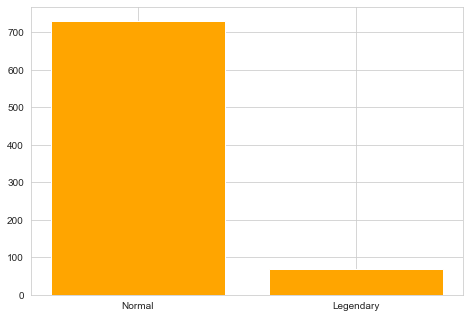

In [1085]:
w = Counter(y).values()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Normal' , 'Legendary']
pok = w
ax.bar(langs,pok,   facecolor='Orange', edgecolor ='w' , color='b', capstyle='projecting', animated=False , ecolor='g')

plt.show()

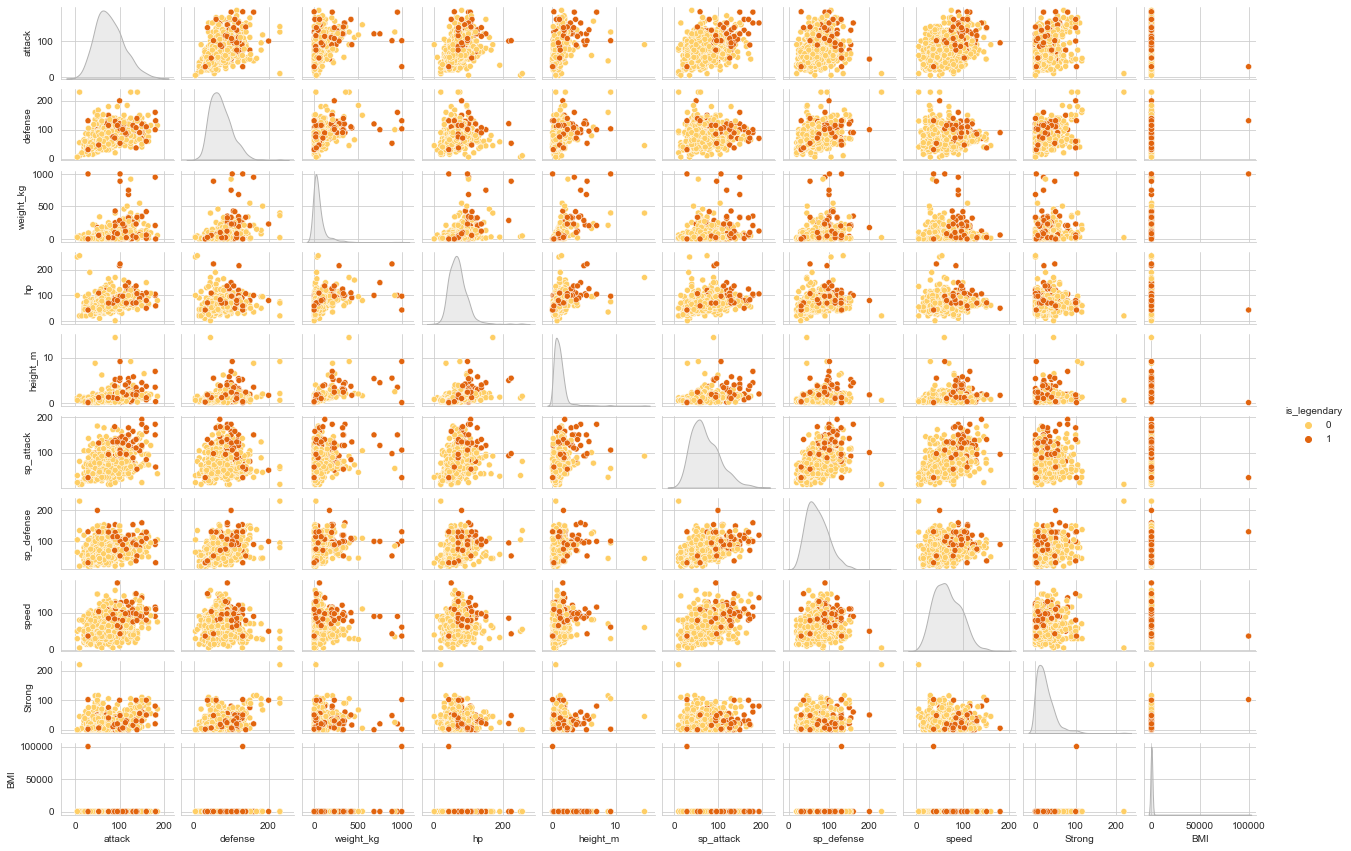

In [1086]:
z = x.join(y)
sns.pairplot(z, palette='YlOrBr' , hue='is_legendary', height=1.2, aspect=1.5, diag_kws={"hue": None, "color": ".7"})

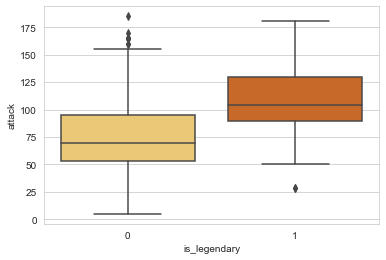

In [1087]:
sns.boxplot(x='is_legendary', y='attack', data=z, palette="YlOrBr");



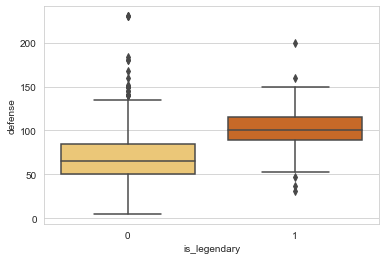

In [1088]:
sns.boxplot(x='is_legendary', y='defense', data=z, palette="YlOrBr");

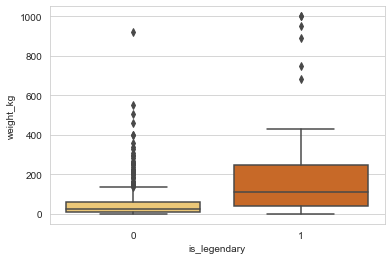

In [1089]:
sns.boxplot(x='is_legendary', y='weight_kg', data=z, palette="YlOrBr");

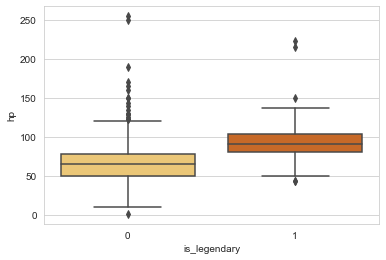

In [1090]:
sns.boxplot(x='is_legendary', y='hp', data=z, palette="YlOrBr");

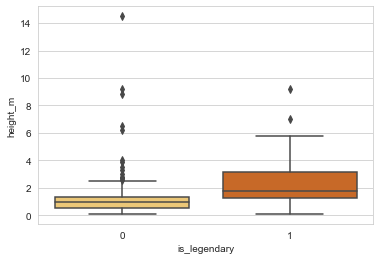

In [1091]:
sns.boxplot(x='is_legendary', y='height_m', data=z, palette="YlOrBr");

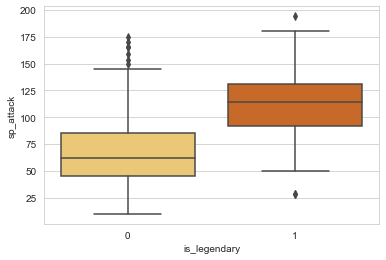

In [1092]:
sns.boxplot(x='is_legendary', y='sp_attack', data=z, palette="YlOrBr");

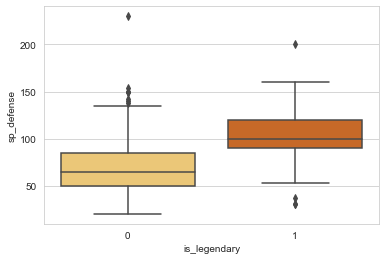

In [1093]:
sns.boxplot(x='is_legendary', y='sp_defense', data=z, palette="YlOrBr");

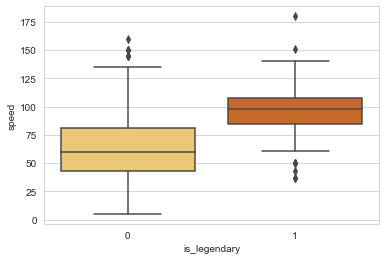

In [1094]:
sns.boxplot(x='is_legendary', y='speed', data=z, palette="YlOrBr");

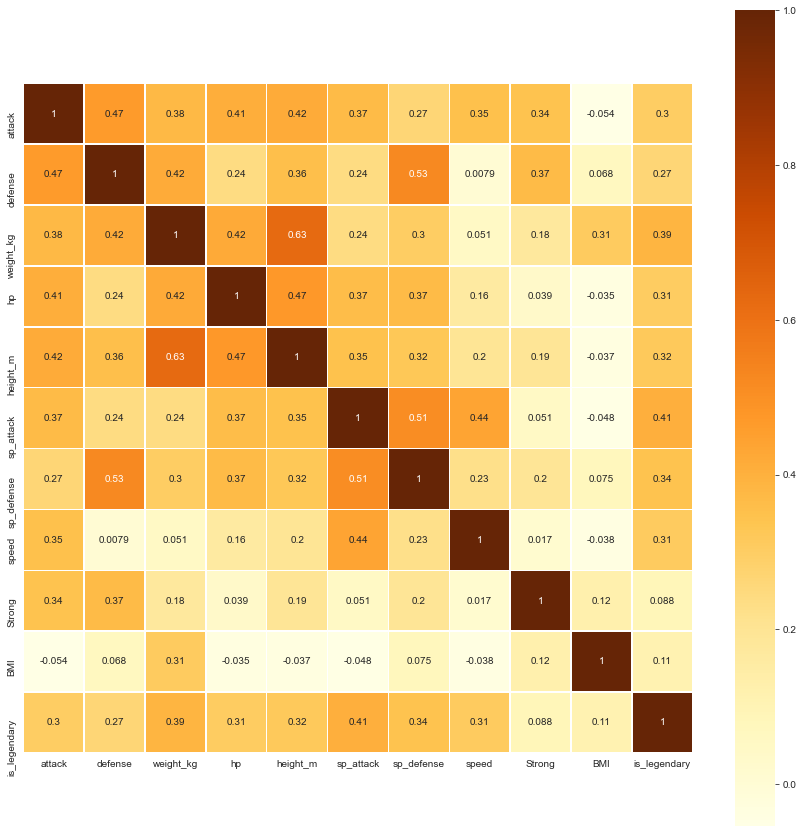

In [1095]:
corr = z.corr()
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
plt.yticks(rotation=0)
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax , square=True, cmap="YlOrBr", )

plt.show()

<AxesSubplot:>

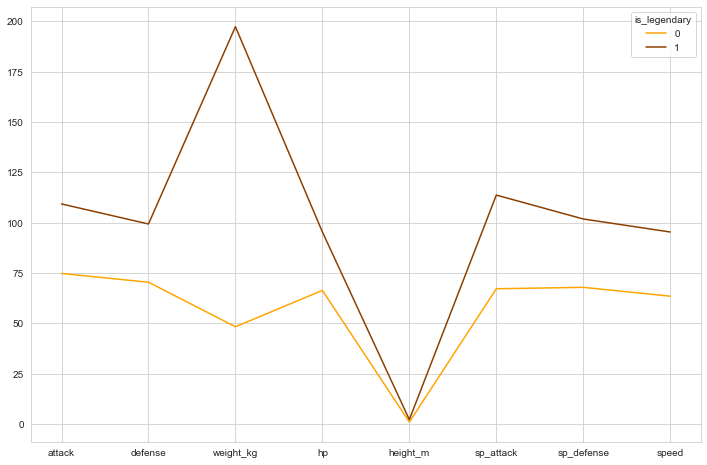

In [1096]:
col = ['orange','#8B3F00']
z.groupby('is_legendary')[['attack','defense','weight_kg','hp','height_m','sp_attack','sp_defense','speed']].mean().T.plot(figsize=(12,8) , color=col)

<AxesSubplot:>

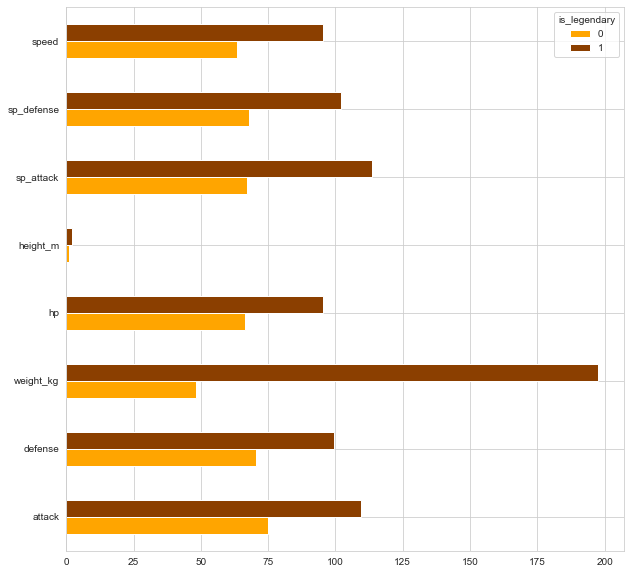

In [1097]:
col = ['orange','#8B3F00']
z.groupby('is_legendary')[['attack','defense','weight_kg','hp','height_m','sp_attack','sp_defense','speed']].mean().T.plot(kind='barh', figsize=(10,10) , color = col)

#  Start Classify ---------------------------------------

In [1099]:
x_tr, x_test, y_tr, y_test = train_test_split(x, y, test_size = 0.2, random_state=19)

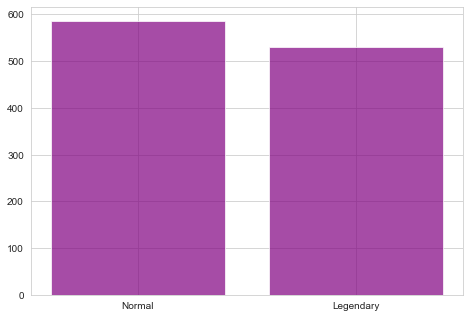

w :  dict_values([587, 530])


In [1100]:
n_pos = np.sum(y_tr == 1)
n_neg = np.sum(y_tr == 0)
ratio = {1 : n_pos * 10, 0 : n_neg} 
smote = imblearn.over_sampling.SMOTE(sampling_strategy=ratio, random_state = 42)
x_train, y_train = smote.fit_resample(x_tr, y_tr)
w = Counter(y_train).values()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Normal' , 'Legendary']
pok = w
ax.bar(langs,pok, facecolor='purple', edgecolor ='w' , color='b', capstyle='projecting', animated=False , alpha=0.7, ecolor='g')
plt.show()
print('w : ', w)

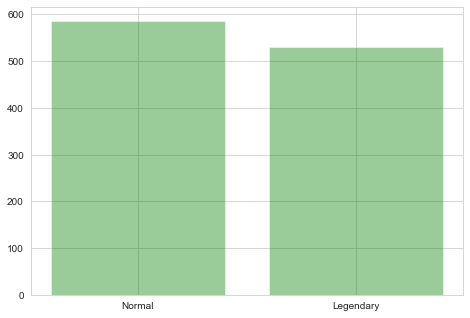

w :  dict_values([587, 530])


In [1101]:
n_pos = np.sum(y_tr == 1)
n_neg = np.sum(y_tr == 0)
ratio = {1 : n_pos * 10, 0 : n_neg} 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 
x_trainover, y_trainover = ROS.fit_resample(x_tr, y_tr)
w = Counter(y_trainover).values()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Normal' , 'Legendary']
pok = w
ax.bar(langs,pok,   facecolor='green', edgecolor ='w' , color='b', capstyle='projecting', animated=False , alpha=0.4, ecolor='g')
plt.show()
print('w : ', w)

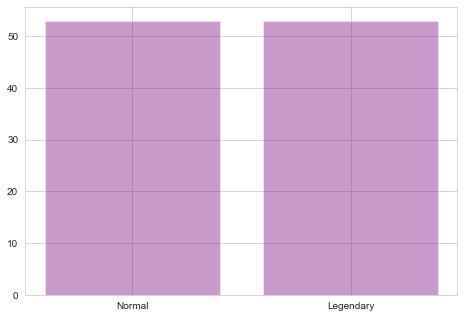

w :  dict_values([53, 53])


In [1102]:
RDS = imblearn.under_sampling.RandomUnderSampler( random_state=42) 
x_traindown, y_traindown = RDS.fit_resample(x_tr, y_tr)
w = Counter(y_traindown).values()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Normal' , 'Legendary']
pok = w
ax.bar(langs,pok,   facecolor='purple',   color='b', capstyle='projecting', animated=False , alpha=0.4, ecolor='g')
plt.show()
print('w : ', w)

In [1103]:
y_tr.shape

(640,)

# --------------------------- KNN

In [1104]:
def cross_val_KNN (x,y,k):
    mean_result = []
    for i in range(10):
        knn = KNeighborsClassifier(n_neighbors = k)
        x_train2, x_val, y_train2, y_val = train_test_split(x, y, test_size = 0.25)
        knn.fit( x_train2, y_train2 )
        mean_result.append(knn.score(x_val, y_val))
    return np.mean(mean_result)
        

In [1105]:
Large = -99999
K = 1
List_k_result = []
list_K = list(range(1,11))

for i in range (10):
    result = cross_val_KNN(x_train,y_train,(i+1))
    List_k_result.append(result)
    if result > Large:
        Large = result
        K = i+1
print('Large L : ',Large)
print ('Best K :' , K)

Large L :  0.9567857142857144
Best K : 2


Text(0, 0.5, 'Cross-Validated Accuracy')

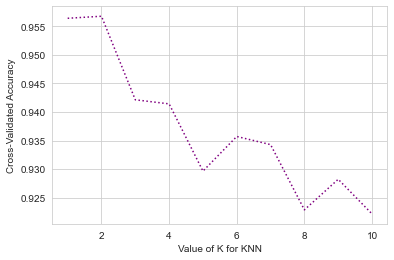

In [1106]:
plt.plot(list_K, List_k_result, color='purple' , linestyle=':' )
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [1107]:
k_range = list(range(1, 11))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [1108]:
# examine the best model -- still 13 neighbors and uniform weights
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 2, 'weights': 'uniform'}
Best estimator:  KNeighborsClassifier(n_neighbors=2)
Best score:  0.951651340002114


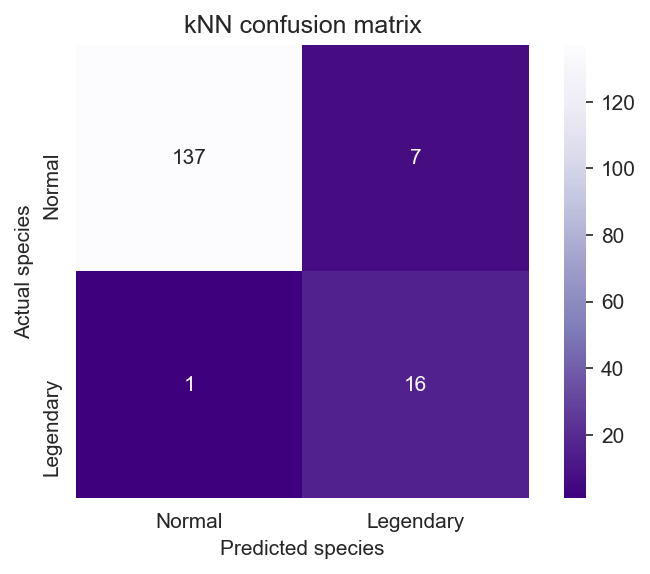

In [1109]:
# Print confusion matrix for kNN
class_lable = ['Normal','Legendary']
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
knn_confusion = confusion_matrix(y_test, knn.predict(x_test))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Purples_r, annot=True, square=True,xticklabels=class_lable, yticklabels=class_lable , fmt='g' )
plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('kNN confusion matrix');



In [1110]:
KNN_percision = round (precision_score(y_test,  knn.predict(x_test), average='macro', zero_division=1),4)
KNN_recall = round (recall_score(y_test,  knn.predict(x_test), average='macro', zero_division=1),4)
F1 = round ((1)/((1/KNN_percision)+(1/KNN_recall)),4)
print('KNN Score : ' , round(knn.score(x_test,y_test),4))
print('KNN Precision : ',KNN_percision)
print('KNN Recall : ',KNN_recall)
print('KNN F1 : ', F1 )

KNN Score :  0.9503
KNN Precision :  0.8442
KNN Recall :  0.9463
KNN F1 :  0.4462


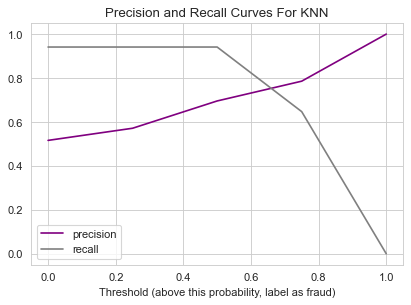

In [1111]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, knn.predict_proba(x_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision' , color='purple')
plt.plot(threshold_curve, recall_curve[1:], label='recall' , color ='gray')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves For KNN');

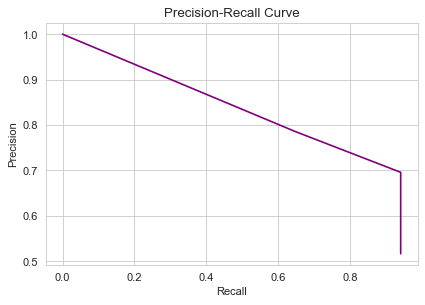

In [1112]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision' , color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

ROC AUC score =  0.9505718954248367


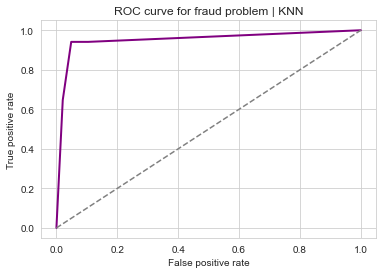

In [1113]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr,lw=2, color='purple')
plt.plot([0,1],[0,1],c='gray',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem | KNN');
print("ROC AUC score = ", roc_auc_score(y_test, knn.predict_proba(x_test)[:,1]))

# --------------------------- KNN with Over Sampling

In [1114]:
def cross_val_KNN (x,y,k):
    mean_result = []
    for i in range(10):
        knno = KNeighborsClassifier(n_neighbors = k)
        x_train2, x_val, y_train2, y_val = train_test_split(x, y, test_size = 0.25)
        knno.fit( x_train2, y_train2 )
        mean_result.append(knno.score(x_val, y_val))
    return np.mean(mean_result)
        

In [1115]:
Large = -99999
K = 1
List_k_result = []
list_K = list(range(1,11))
for i in range (10):
    result = cross_val_KNN(x_trainover,y_trainover,(i+1))
    List_k_result.append(result)
    if result > Large:
        Large = result
        K = i+1
print('Large L : ',Large)
print ('Best K :' , K)

Large L :  0.9771428571428571
Best K : 1


Text(0, 0.5, 'Cross-Validated Accuracy')

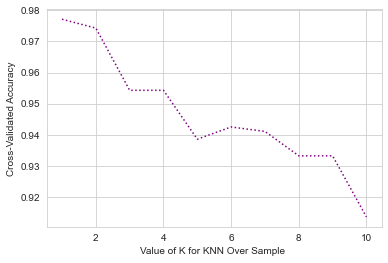

In [1116]:
plt.plot(list_K, List_k_result, color='purple' , linestyle=':' )
plt.xlabel('Value of K for KNN Over Sample ')
plt.ylabel('Cross-Validated Accuracy')

In [1117]:
k_range = list(range(1, 11))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
knno = KNeighborsClassifier()
grid = GridSearchCV(knno, param_grid, cv=3, scoring='accuracy')
grid.fit(x_trainover,y_trainover)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [1118]:
# examine the best model -- still 13 neighbors and uniform weights
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 1, 'weights': 'uniform'}
Best estimator:  KNeighborsClassifier(n_neighbors=1)
Best score:  0.9740359576042357


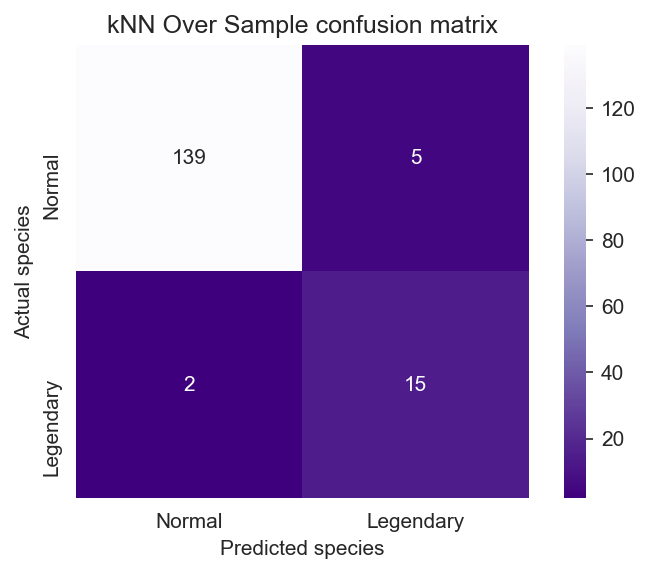

In [1120]:
# Print confusion matrix for kNN
class_lable = ['Normal','Legendary']
knno = KNeighborsClassifier(n_neighbors=4)
knno.fit(x_trainover,y_trainover)
knn_confusion = confusion_matrix(y_test, knno.predict(x_test))
plt.figure(dpi=150)
sns.heatmap(knn_confusion,  cmap=plt.cm.Purples_r, annot=True, square=True,xticklabels=class_lable, yticklabels=class_lable , fmt='g' )
plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('kNN Over Sample confusion matrix');



In [1121]:
KNN_percision = round (precision_score(y_test,  knno.predict(x_test), average='macro', zero_division=1),4)
KNN_recall = round (recall_score(y_test,  knno.predict(x_test), average='macro', zero_division=1),4)
F1 = round ((1)/((1/KNN_percision)+(1/KNN_recall)),4)
print('KNN  Sample Score : ' , round(knno.score(x_test,y_test),4))
print('KNN Over Sample Precision : ',KNN_percision)
print('KNN Over Sample Recall : ',KNN_recall)
print('KNN Over Sample F1 : ', F1 )

KNN  Sample Score :  0.9565
KNN Over Sample Precision :  0.8679
KNN Over Sample Recall :  0.9238
KNN Over Sample F1 :  0.4475


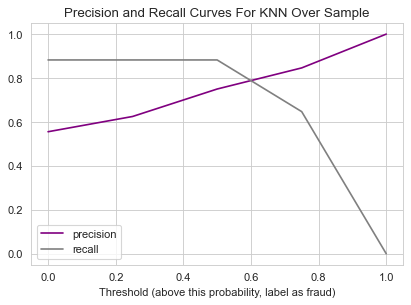

In [1122]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, knno.predict_proba(x_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision' , color='purple')
plt.plot(threshold_curve, recall_curve[1:], label='recall' , color ='gray')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves For KNN Over Sample');

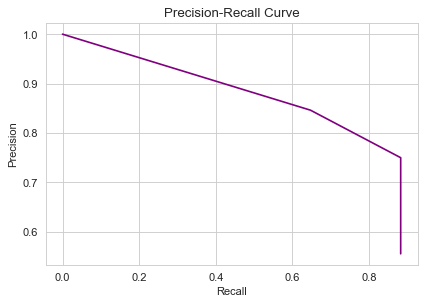

In [1123]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision' , color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

ROC AUC score =  0.9260620915032679


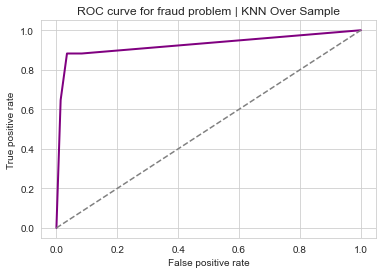

In [1124]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, knno.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr,lw=2, color='purple')
plt.plot([0,1],[0,1],c='gray',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem | KNN Over Sample');
print("ROC AUC score = ", roc_auc_score(y_test, knno.predict_proba(x_test)[:,1]))

# --------------------------- KNN Under sample

In [1125]:
def cross_val_KNN (x,y,k):
    mean_result = []
    for i in range(10):
        knnu = KNeighborsClassifier(n_neighbors = k)
        x_train2, x_val, y_train2, y_val = train_test_split(x, y, test_size = 0.25)
        knnu.fit( x_train2, y_train2 )
        mean_result.append(knnu.score(x_val, y_val))
    return np.mean(mean_result)
        

In [1126]:
Large = -99999
K = 1
List_k_result = []
list_K = list(range(1,11))

for i in range (10):
    result = cross_val_KNN(x_traindown,y_traindown,(i+1))
    List_k_result.append(result)
    if result > Large:
        Large = result
        K = i+1
print('Large L : ',Large)
print ('Best K :' , K)

Large L :  0.8629629629629629
Best K : 7


Text(0, 0.5, 'Cross-Validated Accuracy')

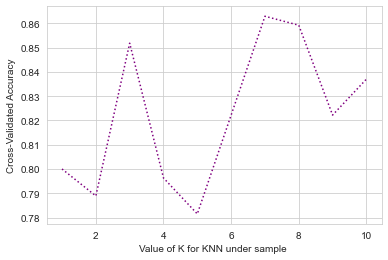

In [1127]:
plt.plot(list_K, List_k_result, color='purple' , linestyle=':' )
plt.xlabel('Value of K for KNN under sample ')
plt.ylabel('Cross-Validated Accuracy')

In [1128]:
k_range = list(range(1, 11))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
knnu = KNeighborsClassifier()
grid = GridSearchCV(knnu, param_grid, cv=3, scoring='accuracy')
grid.fit(x_traindown,y_traindown)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [1129]:
# examine the best model -- still 13 neighbors and uniform weights
print("Best params: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Best score: ", grid.best_score_)

Best params:  {'n_neighbors': 6, 'weights': 'distance'}
Best estimator:  KNeighborsClassifier(n_neighbors=6, weights='distance')
Best score:  0.887037037037037


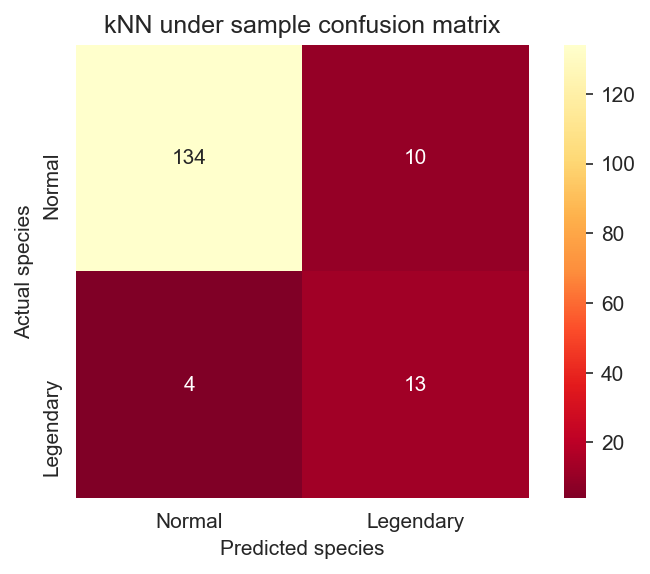

In [1130]:
# Print confusion matrix for kNN
class_lable = ['Normal','Legendary']
knnu = KNeighborsClassifier(n_neighbors=4)
knnu.fit(x_traindown,y_traindown)
knn_confusion = confusion_matrix(y_test, knnu.predict(x_test))
plt.figure(dpi=150)
sns.heatmap(knn_confusion,  cmap=plt.cm.YlOrRd_r, annot=True, square=True,xticklabels=class_lable, yticklabels=class_lable , fmt='g' )
plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('kNN under sample confusion matrix');



In [1131]:
KNN_percision = round (precision_score(y_test,  knnu.predict(x_test), average='macro', zero_division=1),4)
KNN_recall = round (recall_score(y_test,  knnu.predict(x_test), average='macro', zero_division=1),4)
F1 = round ((1)/((1/KNN_percision)+(1/KNN_recall)),4)
print('KNN under sample Score : ' , round(knnu.score(x_test,y_test),4))
print('KNN under sample Precision : ',KNN_percision)
print('KNN under sample Recall : ',KNN_recall)
print('KNN under sample F1 : ', F1 )

KNN under sample Score :  0.913
KNN under sample Precision :  0.7681
KNN under sample Recall :  0.8476
KNN under sample F1 :  0.4029


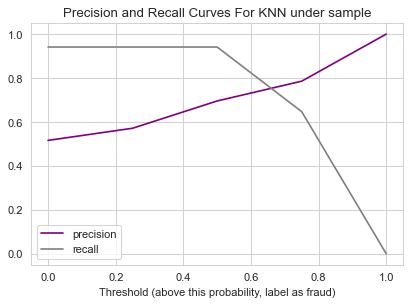

In [1132]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, knn.predict_proba(x_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision' , color='purple')
plt.plot(threshold_curve, recall_curve[1:], label='recall' , color ='gray')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves For KNN under sample');

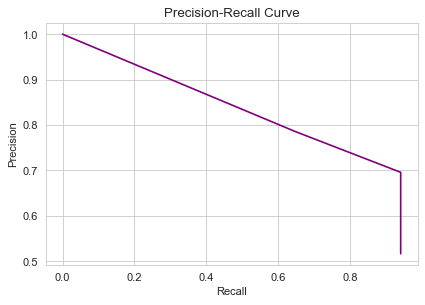

In [1133]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision' , color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

ROC AUC score =  0.9528186274509804


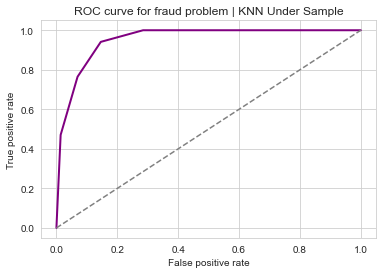

In [1134]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, knnu.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr,lw=2, color='purple')
plt.plot([0,1],[0,1],c='gray',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem | KNN Under Sample');
print("ROC AUC score = ", roc_auc_score(y_test, knnu.predict_proba(x_test)[:,1]))

# --------------------------- Logistic Regression

In [1135]:
def cross_val_lm (x,y):
    mean_result = []
    for i in range(10):
        lm = LogisticRegression(max_iter=1000)
        std_scale = StandardScaler()
        x_train2, x_val, y_train2, y_val = train_test_split(x, y, test_size = 0.25)
        x_train_scaled = std_scale.fit_transform(x_train2)
        X_val_scaled = std_scale.fit_transform(x_val)
        lm.fit( x_train_scaled, y_train2 )
        mean_result.append(lm.score(X_val_scaled, y_val))
    return np.mean(mean_result)

In [1136]:
Large = -99999
List_lm_result = []
list_lm = list(range(1,11))

for i in range (10):
    result = cross_val_lm(x_train,y_train)
    List_k_result.append(result)
    if result > Large:
        Large = result
print('Large L : ',Large)

Large L :  0.9446428571428571


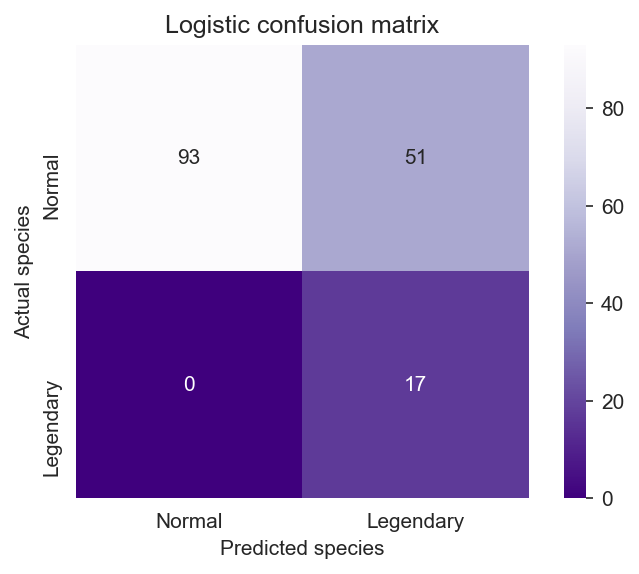

In [1137]:
# Print confusion matrix for Logistic
lm = LogisticRegression(max_iter=1000)
std_scale = StandardScaler()
x_train_scaled = std_scale.fit_transform(x_train)
X_test_scaled = std_scale.fit_transform(x_test)
lm.fit(x_train_scaled,y_train)
lm_confusion = confusion_matrix(y_test, lm.predict(X_test_scaled))
plt.figure(dpi=150)
sns.heatmap(lm_confusion, cmap=plt.cm.Purples_r, annot=True, square=True,xticklabels=class_lable, yticklabels=class_lable, fmt='g')
plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('Logistic confusion matrix');


In [1138]:
lm_percision = round (precision_score(y_test,  lm.predict(X_test_scaled), average='macro', zero_division=1),4)
lm_recall = round (recall_score(y_test,  lm.predict(X_test_scaled), average='macro', zero_division=1),4)
F1 = round ((1)/((1/lm_percision)+(1/lm_recall)),4)
print('Logistic Score : ' , round(lm.score(X_test_scaled,y_test),4))
print('Logistic Precision : ',lm_percision)
print('Logistic Recall : ',lm_recall)
print('Logistic F1 : ', F1 )

Logistic Score :  0.6832
Logistic Precision :  0.625
Logistic Recall :  0.8229
Logistic F1 :  0.3552


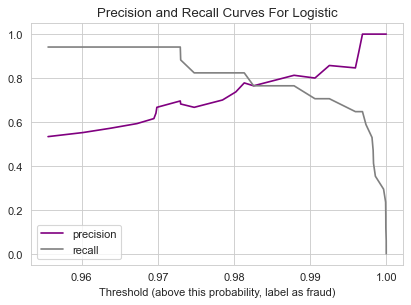

In [1139]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lm.predict_proba(X_test_scaled)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision' , color='purple')
plt.plot(threshold_curve, recall_curve[1:], label='recall' , color ='gray')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves For Logistic');

ROC AUC score =  0.9848856209150327


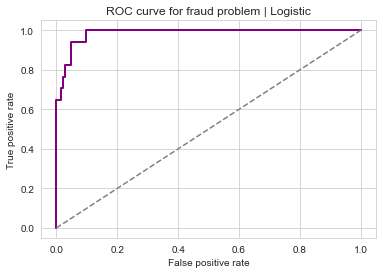

In [1140]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, lm.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr, tpr,lw=2, color='purple')
plt.plot([0,1],[0,1],c='gray',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem | Logistic');
print("ROC AUC score = ", roc_auc_score(y_test, lm.predict_proba(X_test_scaled)[:,1]))

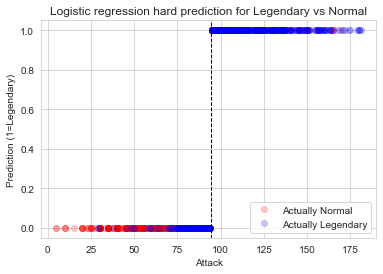

In [1141]:
def viz(df, model, hard_classification=True, decision_boundary=True):

    # extract elevation feature and hard or soft predictions  
    feature = x_train[['attack']].values
    
    if hard_classification:
        #print('here')
        predictions = model.predict(feature) # "predict 0 or 1"
    else:
        predictions = model.predict_proba(feature)[:, 1]  # "predict probabilities"
    
    # color filter true class labels and plot predictions
    sf_mask = (y_train == 0).values 
    plt.plot(feature[sf_mask], predictions[sf_mask], 'ro', label='Actually Normal', alpha=0.2) # "plot the class 'SF' predicted and actual"
    plt.plot(feature[~sf_mask], predictions[~sf_mask], 'bo', label='Actually Legendary', alpha=0.2)  # "plot the class not 'SF' predicted and actual"

    # optionally calculate and display decision boundary as dotted line
    if decision_boundary:
        b_0, b_1 = model.intercept_, model.coef_[0]
        plt.gca().axvline(-b_0/b_1,c='k',ls='--',lw=1)

    # plot formatting
    plt.ylim(-0.05, 1.05)
    plt.xlabel('Attack')
    plt.ylabel('Prediction (1=Legendary)')
    type_str = 'hard' if hard_classification else 'soft'
    plt.title('Logistic regression ' + type_str + ' prediction for Legendary vs Normal')
    plt.legend(loc='lower right')
lmx = LogisticRegression(max_iter=1000)
lmx.fit(x_train[['attack']], y_train)    
viz(z, lmx, decision_boundary=True) # "plots the 0, 1 predictions"
#z

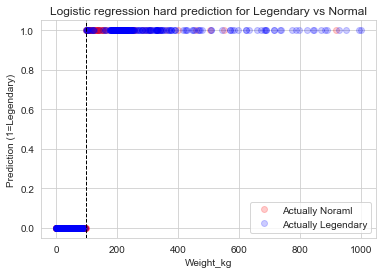

In [1142]:
def viz(df, model, hard_classification=True, decision_boundary=True):

    # extract elevation feature and hard or soft predictions  
    feature = x_train[['weight_kg']].values
    
    if hard_classification:
        #print('here')
        predictions = model.predict(feature) # "predict 0 or 1"
    else:
        predictions = model.predict_proba(feature)[:, 1]  # "predict probabilities"
    
    # color filter true class labels and plot predictions
    sf_mask = (y_train == 0).values 
    plt.plot(feature[sf_mask], predictions[sf_mask], 'ro', label='Actually Noraml', alpha=0.2) # "plot the class 'SF' predicted and actual"
    plt.plot(feature[~sf_mask], predictions[~sf_mask], 'bo', label='Actually Legendary', alpha=0.2)  # "plot the class not 'SF' predicted and actual"

    # optionally calculate and display decision boundary as dotted line
    if decision_boundary:
        b_0, b_1 = model.intercept_, model.coef_[0]
        plt.gca().axvline(-b_0/b_1,c='k',ls='--',lw=1)

    # plot formatting
    plt.ylim(-0.05, 1.05)
    plt.xlabel('Weight_kg')
    plt.ylabel('Prediction (1=Legendary)')
    type_str = 'hard' if hard_classification else 'soft'
    plt.title('Logistic regression ' + type_str + ' prediction for Legendary vs Normal')
    plt.legend(loc='lower right')
lmx = LogisticRegression(max_iter=1000)
lmx.fit(x_train[['weight_kg']], y_train)    
viz(z, lmx, decision_boundary=True) # "plots the 0, 1 predictions"
#z

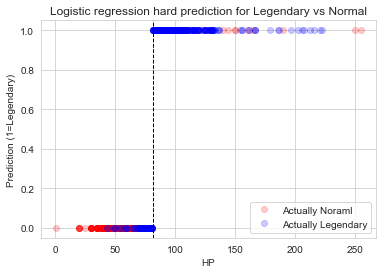

In [1143]:
def viz(df, model, hard_classification=True, decision_boundary=True):

    # extract elevation feature and hard or soft predictions  
    feature = x_train[['hp']].values
    
    if hard_classification:
        #print('here')
        predictions = model.predict(feature) # "predict 0 or 1"
    else:
        predictions = model.predict_proba(feature)[:, 1]  # "predict probabilities"
    
    # color filter true class labels and plot predictions
    sf_mask = (y_train == 0).values 
    plt.plot(feature[sf_mask], predictions[sf_mask], 'ro', label='Actually Noraml', alpha=0.2) # "plot the class 'SF' predicted and actual"
    plt.plot(feature[~sf_mask], predictions[~sf_mask], 'bo', label='Actually Legendary', alpha=0.2)  # "plot the class not 'SF' predicted and actual"

    # optionally calculate and display decision boundary as dotted line
    if decision_boundary:
        b_0, b_1 = model.intercept_, model.coef_[0]
        plt.gca().axvline(-b_0/b_1,c='k',ls='--',lw=1)

    # plot formatting
    plt.ylim(-0.05, 1.05)
    plt.xlabel('HP')
    plt.ylabel('Prediction (1=Legendary)')
    type_str = 'hard' if hard_classification else 'soft'
    plt.title('Logistic regression ' + type_str + ' prediction for Legendary vs Normal')
    plt.legend(loc='lower right')
lmx = LogisticRegression(max_iter=1000)
lmx.fit(x_train[['hp']], y_train)    
viz(z, lmx, decision_boundary=True) # "plots the 0, 1 predictions"
#z

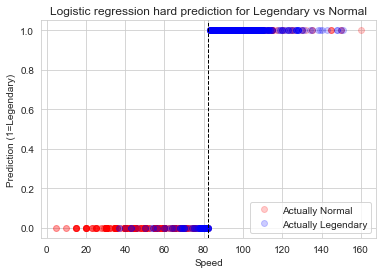

In [1144]:
def viz(df, model, hard_classification=True, decision_boundary=True):

    # extract elevation feature and hard or soft predictions  
    feature = x_train[['speed']].values
    
    if hard_classification:
        #print('here')
        predictions = model.predict(feature) # "predict 0 or 1"
    else:
        predictions = model.predict_proba(feature)[:, 1]  # "predict probabilities"
    
    # color filter true class labels and plot predictions
    sf_mask = (y_train == 0).values 
    plt.plot(feature[sf_mask], predictions[sf_mask], 'ro', label='Actually Normal', alpha=0.2) # "plot the class 'SF' predicted and actual"
    plt.plot(feature[~sf_mask], predictions[~sf_mask], 'bo', label='Actually Legendary', alpha=0.2)  # "plot the class not 'SF' predicted and actual"

    # optionally calculate and display decision boundary as dotted line
    if decision_boundary:
        b_0, b_1 = model.intercept_, model.coef_[0]
        plt.gca().axvline(-b_0/b_1,c='k',ls='--',lw=1)

    # plot formatting
    plt.ylim(-0.05, 1.05)
    plt.xlabel('Speed')
    plt.ylabel('Prediction (1=Legendary)')
    type_str = 'hard' if hard_classification else 'soft'
    plt.title('Logistic regression ' + type_str + ' prediction for Legendary vs Normal')
    plt.legend(loc='lower right')
lmx = LogisticRegression(max_iter=1000)
lmx.fit(x_train[['speed']], y_train)    
viz(z, lmx, decision_boundary=True) # "plots the 0, 1 predictions"
#z

# --------------------------- Decision Tree 

In [1145]:
def cross_val_dt (x,y,d):
    mean_result = []
    for i in range(20):
        dt = DecisionTreeClassifier(max_depth= d)
        x_train2, x_val, y_train2, y_val = train_test_split(x, y, test_size = 0.25)
        dt.fit( x_train2, y_train2 )
        mean_result.append(dt.score(x_val, y_val))
    return np.mean(mean_result)        

In [1146]:
Large = -99999
depth = 1
List_depth_result = []
list_depth = list(range(1,11))

for i in range (10):
    result = cross_val_dt(x_train,y_train,(i+1))
    List_depth_result.append(result)
    if result > Large:
        Large = result
        depth = i+1
print('Large L : ',Large)
print ('Best Depth :' , depth)

Large L :  0.9375
Best Depth : 5


Decision Tree Score :  0.9068


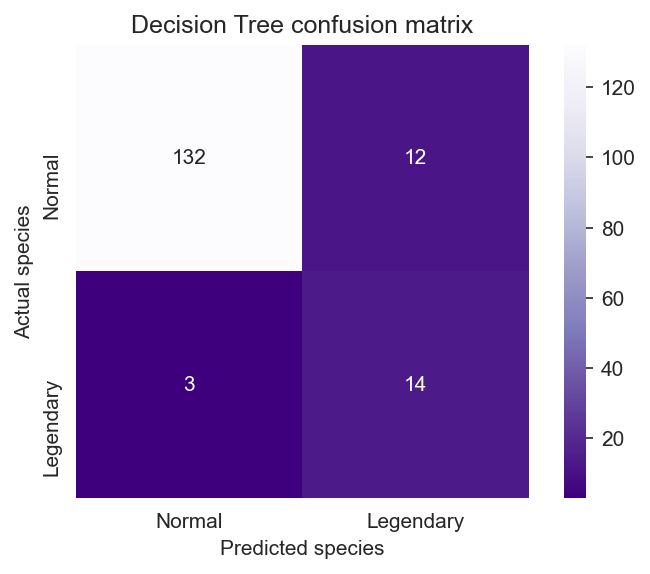

In [1147]:
# Print confusion matrix for Decision Tree
dt = DecisionTreeClassifier(max_depth= depth)
dt.fit(x_train,y_train)
dt_confusion = confusion_matrix(y_test, dt.predict(x_test))
plt.figure(dpi=150)
sns.heatmap(dt_confusion, cmap=plt.cm.Purples_r, annot=True, square=True,xticklabels=class_lable, yticklabels=class_lable, fmt='g')
plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('Decision Tree confusion matrix');
print('Decision Tree Score : ' , round(dt.score(x_test,y_test),4))

Text(0, 0.5, 'Cross-Validated Accuracy')

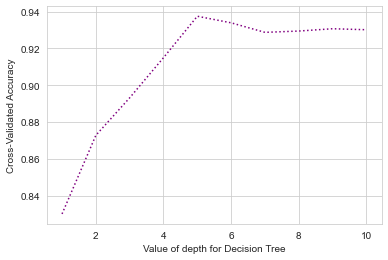

In [1148]:
plt.plot(list_depth, List_depth_result, color='purple' , linestyle=':' )
plt.xlabel('Value of depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')

In [1149]:
dt_percision = round (precision_score(y_test,  dt.predict(x_test), average='macro', zero_division=1),4)
dt_recall = round (recall_score(y_test,  dt.predict(x_test), average='macro', zero_division=1),4)
F1 = round ((1)/((1/dt_percision)+(1/dt_recall)),4)
print('Decision Tree Score : ' , round(dt.score(x_test,y_test),4))
print('Decision Tree Precision : ',dt_percision)
print('Decision Tree Recall : ',dt_recall)
print('Decision Tree F1 : ', F1 )

Decision Tree Score :  0.9068
Decision Tree Precision :  0.7581
Decision Tree Recall :  0.8701
Decision Tree F1 :  0.4051


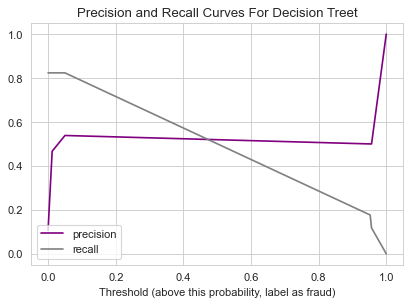

In [1150]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, dt.predict_proba(x_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision' , color='purple')
plt.plot(threshold_curve, recall_curve[1:], label='recall' , color ='gray')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves For Decision Treet');

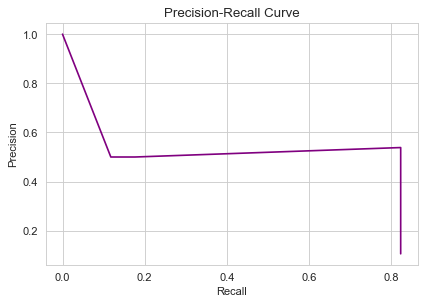

In [1151]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision' , color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

ROC AUC score =  0.803921568627451


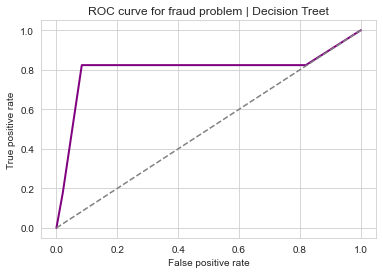

In [1152]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr,lw=2, color='purple')
plt.plot([0,1],[0,1],c='gray',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem | Decision Treet');
print("ROC AUC score = ", roc_auc_score(y_test, dt.predict_proba(x_test)[:,1]))

#  Random forest  # ---------------------------

In [1153]:
def cross_val_rf (x,y,d):
    mean_result = []
    for i in range(20):
        rf = RandomForestClassifier(max_depth= d)
        x_train2, x_val, y_train2, y_val = train_test_split(x, y, test_size = 0.25)
        rf.fit( x_train2, y_train2 )
        mean_result.append(rf.score(x_val, y_val))
    return np.mean(mean_result)        

In [1154]:
Large = -99999
rf_depth = 1
List_rf_depth_result = []
list_rf_depth = list(range(1,11))

for i in range (10):
    result = cross_val_rf(x_train,y_train,(i+1))
    List_rf_depth_result.append(result)
    if result > Large:
        Large = result
        rf_depth = i+1
print('Large L : ',Large)
print ('Best rf depth :' , rf_depth)

Large L :  0.9696428571428573
Best rf depth : 7


Random Forest Score :  0.9317


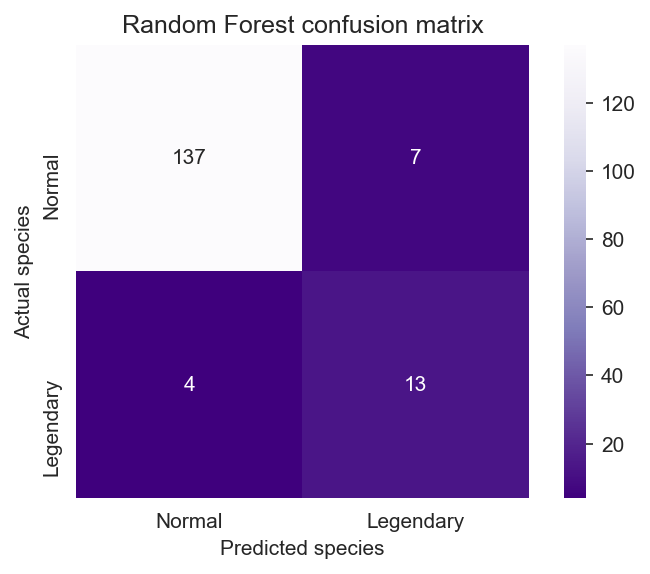

In [1155]:
# Print confusion matrix for Random Forest
rf = RandomForestClassifier(max_depth= rf_depth)
rf.fit(x_train,y_train)
rf_confusion = confusion_matrix(y_test, rf.predict(x_test))
plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Purples_r, annot=True, square=True,xticklabels=class_lable, yticklabels=class_lable, fmt='g')
plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('Random Forest confusion matrix');
print('Random Forest Score : ' , round(rf.score(x_test,y_test),4))

Text(0, 0.5, 'Cross-Validated Accuracy')

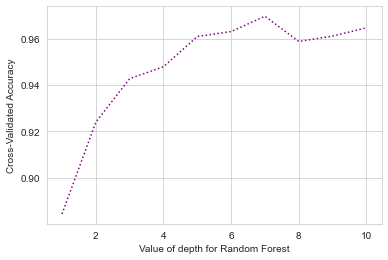

In [1156]:
plt.plot(list_rf_depth, List_rf_depth_result, color='purple' , linestyle=':' )
plt.xlabel('Value of depth for Random Forest')
plt.ylabel('Cross-Validated Accuracy')

In [1157]:
rf_percision = round (precision_score(y_test,  rf.predict(x_test), average='macro', zero_division=1),4)
rf_recall = round (recall_score(y_test,  rf.predict(x_test), average='macro', zero_division=1),4)
F1 = round ((1)/((1/rf_percision)+(1/rf_recall)),4)
print('Random Forest Score : ' , round(rf.score(x_test,y_test),4))
print('Random Forest Precision : ',rf_percision)
print('Random Forest Recall : ',rf_recall)
print('Random Forest F1 : ', F1 )

Random Forest Score :  0.9317
Random Forest Precision :  0.8108
Random Forest Recall :  0.858
Random Forest F1 :  0.4169


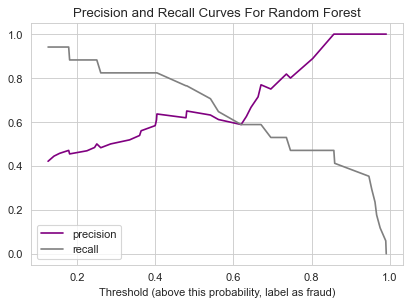

In [1158]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, rf.predict_proba(x_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision' , color='purple')
plt.plot(threshold_curve, recall_curve[1:], label='recall' , color ='gray')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves For Random Forest');

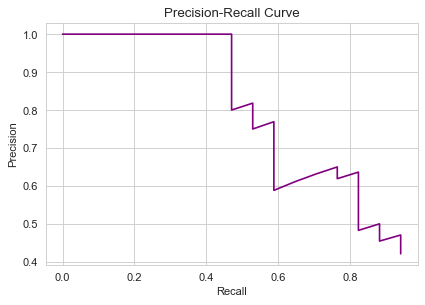

In [1159]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision' , color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

ROC AUC score =  0.9636437908496731


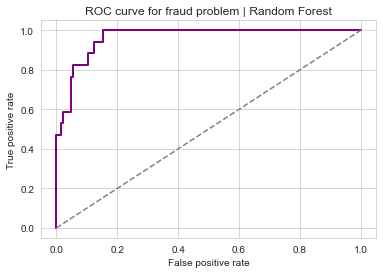

In [1160]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr,lw=2, color='purple')
plt.plot([0,1],[0,1],c='gray',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem | Random Forest');
print("ROC AUC score = ", roc_auc_score(y_test, rf.predict_proba(x_test)[:,1]))

# --------------------------- GaussianNB

In [1161]:
def cross_val_gnb (x,y):
    mean_result = []
    for i in range(20):
        gnb = GaussianNB()
        x_train2, x_val, y_train2, y_val = train_test_split(x, y, test_size = 0.25)
        gnb.fit( x_train2, y_train2 )
        mean_result.append(gnb.score(x_val, y_val))
    return np.mean(mean_result)        

In [1162]:
Large = -99999
for i in range (10):
    result = cross_val_gnb(x_train,y_train)
    if result > Large:
        Large = result
print('Large L GaussianNB : ',Large)

Large L GaussianNB :  0.7444642857142856


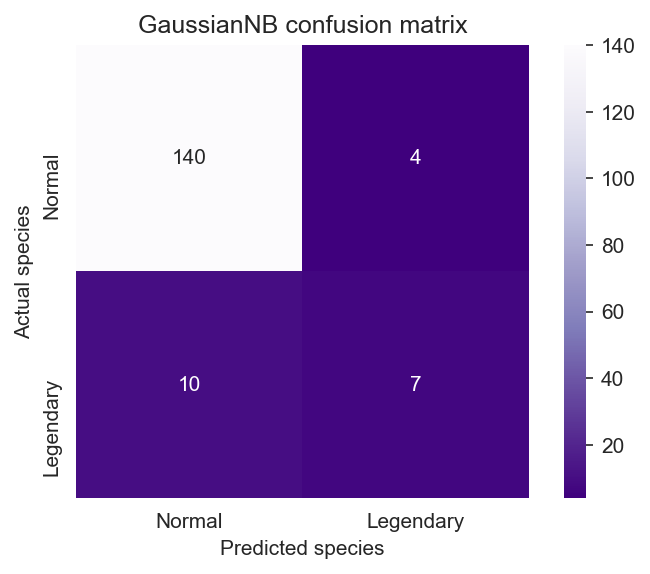

In [1163]:
# Print confusion matrix for GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb_confusion = confusion_matrix(y_test, gnb.predict(x_test))
plt.figure(dpi=150)
sns.heatmap(gnb_confusion, cmap=plt.cm.Purples_r, annot=True, square=True,xticklabels=class_lable, yticklabels=class_lable, fmt='g')
plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('GaussianNB confusion matrix');

In [1164]:
gnb_percision = round (precision_score(y_test,  gnb.predict(x_test), average='macro', zero_division=1),4)
gnb_recall = round (recall_score(y_test,  gnb.predict(x_test), average='macro', zero_division=1),4)
F1 = round ((1)/((1/gnb_percision)+(1/gnb_recall)),4)
print('GaussianNB Score : ' , round(gnb.score(x_test,y_test),4))
print('GaussianNB Precision : ',gnb_percision)
print('GaussianNB Recall : ',gnb_recall)
print('GaussianNB F1 : ', F1 )

GaussianNB Score :  0.913
GaussianNB Precision :  0.7848
GaussianNB Recall :  0.692
GaussianNB F1 :  0.3677


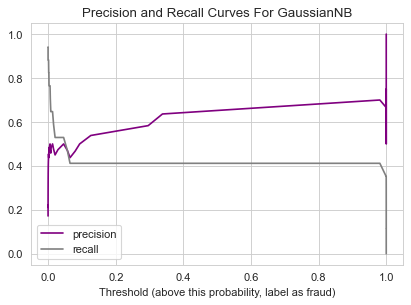

In [1165]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, gnb.predict_proba(x_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision' , color='purple')
plt.plot(threshold_curve, recall_curve[1:], label='recall' , color ='gray')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves For GaussianNB');

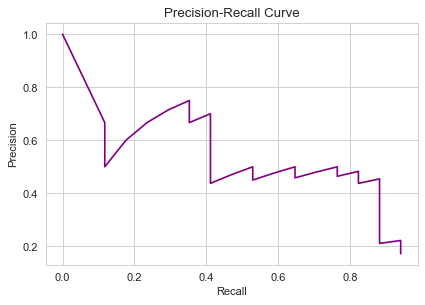

In [1166]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision' , color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

ROC AUC score =  0.9003267973856209


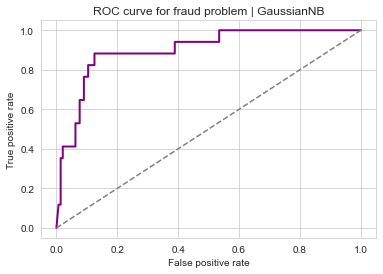

In [1167]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, gnb.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr,lw=2, color='purple')
plt.plot([0,1],[0,1],c='gray',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem | GaussianNB');
print("ROC AUC score = ", roc_auc_score(y_test, gnb.predict_proba(x_test)[:,1]))

# --------------------------- MultinomialNB

In [1168]:
def cross_val_mnb (x,y):
    mean_result = []
    for i in range(20):
        mnb = MultinomialNB()
        x_train2, x_val, y_train2, y_val = train_test_split(x, y, test_size = 0.25)
        mnb.fit( x_train2, y_train2 )
        mean_result.append(mnb.score(x_val, y_val))
    return np.mean(mean_result)        

In [1169]:
Large = -99999
for i in range (10):
    result = cross_val_mnb(x_train,y_train)
    if result > Large:
        Large = result
print('Large L MultinomialNB : ',Large)

Large L MultinomialNB :  0.535


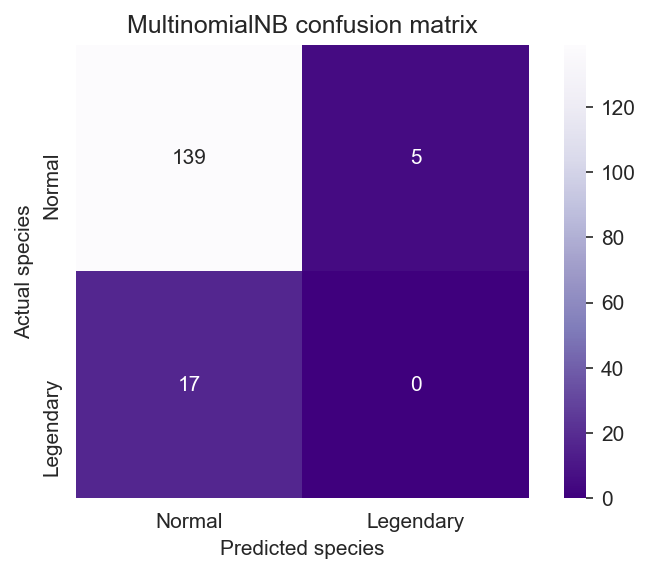

In [1171]:
# Print confusion matrix for MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
mnb_confusion = confusion_matrix(y_test, mnb.predict(x_test))
plt.figure(dpi=150)
sns.heatmap(mnb_confusion, cmap=plt.cm.Purples_r, annot=True, square=True,xticklabels=class_lable, yticklabels=class_lable, fmt='g')
plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('MultinomialNB confusion matrix');


In [1172]:
mnb_percision = round (precision_score(y_test,  mnb.predict(x_test), average='macro', zero_division=1),4)
mnb_recall = round (recall_score(y_test,  mnb.predict(x_test), average='macro', zero_division=1),4)
F1 = round ((1)/((1/mnb_percision)+(1/mnb_recall)),4)
print('MultinomialNB Score : ' , round(mnb.score(x_test,y_test),4))
print('MultinomialNB Precision : ',mnb_percision)
print('MultinomialNB Recall : ',mnb_recall)
print('MultinomialNB F1 : ', F1 )

MultinomialNB Score :  0.8634
MultinomialNB Precision :  0.4455
MultinomialNB Recall :  0.4826
MultinomialNB F1 :  0.2317


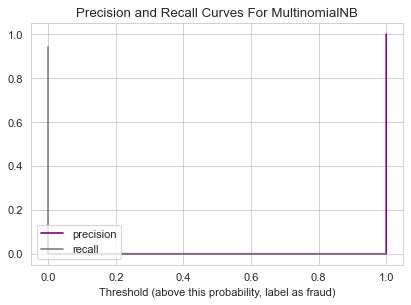

In [1173]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, mnb.predict_proba(x_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision' , color='purple')
plt.plot(threshold_curve, recall_curve[1:], label='recall' , color ='gray')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves For MultinomialNB');

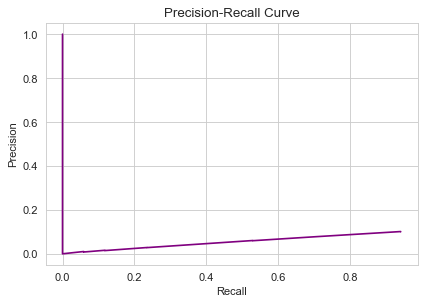

In [1174]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision' , color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

ROC AUC score =  0.05024509803921567


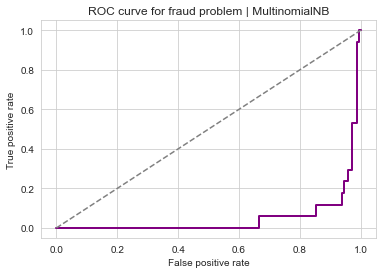

In [1175]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, mnb.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr,lw=2, color='purple')
plt.plot([0,1],[0,1],c='gray',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem | MultinomialNB');
print("ROC AUC score = ", roc_auc_score(y_test, mnb.predict_proba(x_test)[:,1]))

# --------------------------- BernoulliNB

In [1176]:
def cross_val_bnb (x,y):
    mean_result = []
    for i in range(20):
        bnb = BernoulliNB()
        x_train2, x_val, y_train2, y_val = train_test_split(x, y, test_size = 0.25)
        bnb.fit( x_train2, y_train2 )
        mean_result.append(bnb.score(x_val, y_val))
    return np.mean(mean_result)        

In [1177]:
Large = -99999
for i in range (10):
    result = cross_val_bnb(x_train,y_train)
    if result > Large:
        Large = result
print('Large L BernoulliNB : ',Large)

Large L BernoulliNB :  0.5251785714285715


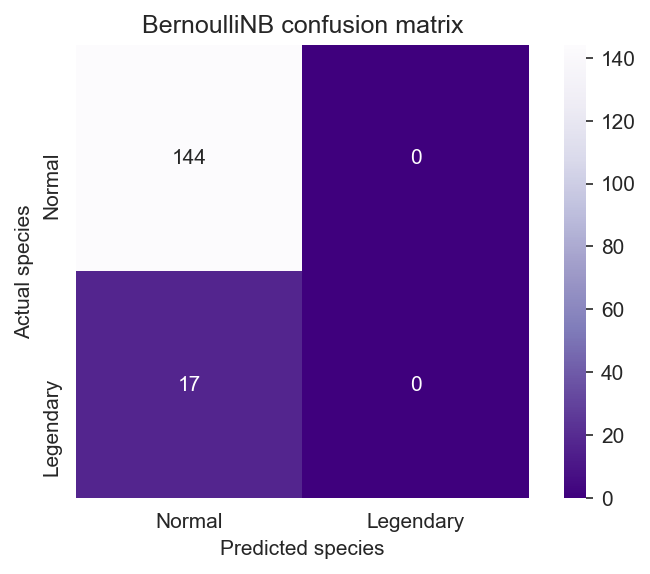

In [1178]:
# Print confusion matrix for BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
bnb_confusion = confusion_matrix(y_test, bnb.predict(x_test))
plt.figure(dpi=150)
sns.heatmap(bnb_confusion, cmap=plt.cm.Purples_r, annot=True, square=True,xticklabels=class_lable, yticklabels=class_lable, fmt='g')
plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('BernoulliNB confusion matrix');

In [1179]:
bnb_percision = round (precision_score(y_test,  bnb.predict(x_test), average='macro', zero_division=1),4)
bnb_recall = round (recall_score(y_test,  bnb.predict(x_test), average='macro', zero_division=1),4)
F1 = round ((1)/((1/bnb_percision)+(1/bnb_recall)),4)
print('BernoulliNB Score : ' , round(bnb.score(x_test,y_test),4))
print('BernoulliNB Precision : ',bnb_percision)
print('BernoulliNB Recall : ',bnb_recall)
print('BernoulliNB F1 : ', F1 )

BernoulliNB Score :  0.8944
BernoulliNB Precision :  0.9472
BernoulliNB Recall :  0.5
BernoulliNB F1 :  0.3273


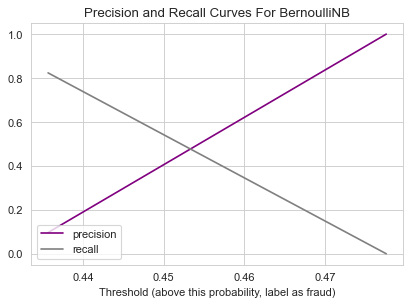

In [1180]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, bnb.predict_proba(x_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision' , color='purple')
plt.plot(threshold_curve, recall_curve[1:], label='recall' , color ='gray')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves For BernoulliNB');

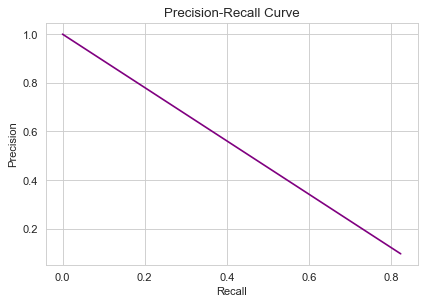

In [1181]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision' , color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

ROC AUC score =  0.45690359477124187


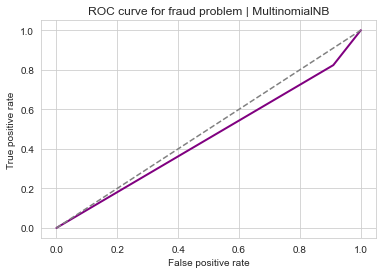

In [1182]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, bnb.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr,lw=2, color='purple')
plt.plot([0,1],[0,1],c='gray',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem | MultinomialNB');
print("ROC AUC score = ", roc_auc_score(y_test, bnb.predict_proba(x_test)[:,1]))

# --------------------------- Max Voting  

In [1183]:
list_all_model = [('bnb' , BernoulliNB()),('mnb' , MultinomialNB()),('gnb' , GaussianNB()),('rf' , RandomForestClassifier(max_depth=5)),('dt' , DecisionTreeClassifier(max_depth=5)),('lm' , LogisticRegression(max_iter=1000)),('knn' , KNeighborsClassifier(n_neighbors=3))] 

In [1184]:
# create voting classifier
voting_classifer = VotingClassifier(estimators=list_all_model, voting='hard', n_jobs=-1 , )
voting_classifer.fit(x_train, y_train)
y_pred = voting_classifer.predict(x_test)
print('Classify by using Max Voting : ' , round(accuracy_score(y_test, y_pred),4))

Classify by using Max Voting :  0.9503


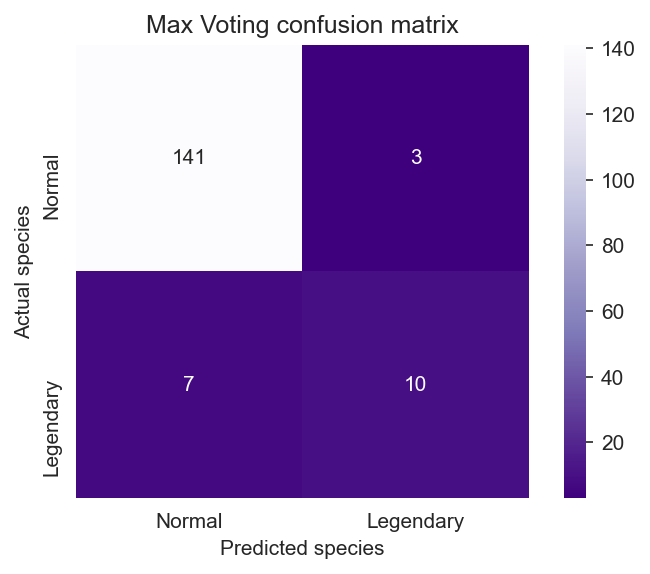

In [1185]:
# Print confusion matrix for BernoulliNB
voting_classifer.fit(x_train,y_train)
voting_classifer_confusion = confusion_matrix(y_test, voting_classifer.predict(x_test))
plt.figure(dpi=150)
sns.heatmap(voting_classifer_confusion, cmap=plt.cm.Purples_r, annot=True, square=True,xticklabels=class_lable, yticklabels=class_lable, fmt='g')
plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('Max Voting confusion matrix');

In [1186]:
voting_classifer_percision = round (precision_score(y_test,  voting_classifer.predict(x_test), average='macro', zero_division=1),4)
voting_classifer_recall = round (recall_score(y_test,  voting_classifer.predict(x_test), average='macro', zero_division=1),4)
F1 = round ((1)/((1/voting_classifer_percision)+(1/voting_classifer_recall)),4)
print('Max Voting Score : ' , round(voting_classifer.score(x_test,y_test),4))
print('Max Voting Precision : ',voting_classifer_percision)
print('Max Voting Recall : ',voting_classifer_recall)
print('Max Voting F1 : ', F1 )

Max Voting Score :  0.9379
Max Voting Precision :  0.861
Max Voting Recall :  0.7837
Max Voting F1 :  0.4103


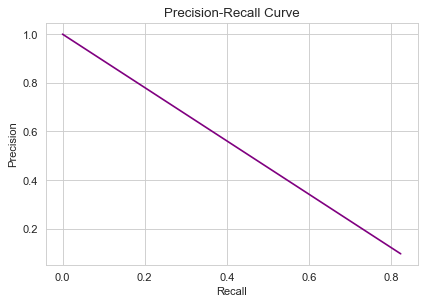

In [1187]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision' , color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

# --------------------------- Average Voting  

In [1188]:
# create voting classifier
voting_classifer = VotingClassifier(estimators=list_all_model, voting='soft', n_jobs=-1)
voting_classifer.fit(x_train, y_train)
y_pred = voting_classifer.predict(x_test)
print('Classify by using Average Voting : ' , round(accuracy_score(y_test, y_pred),4))

Classify by using Average Voting :  0.9565


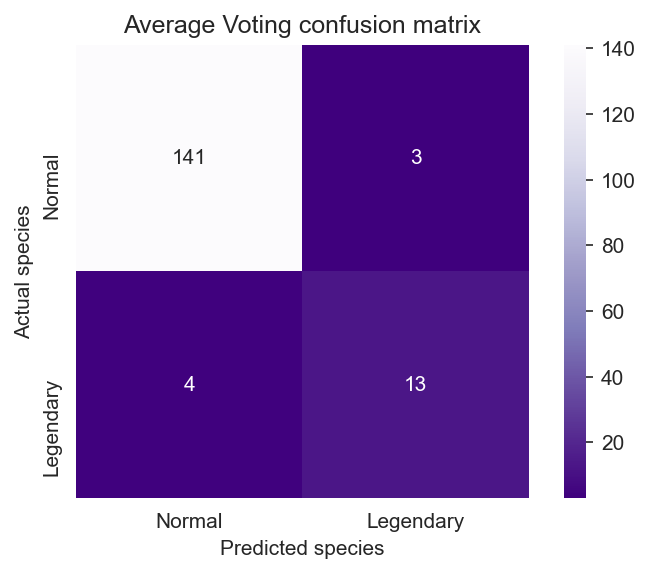

In [1189]:
# Print confusion matrix for BernoulliNB
voting_classifer.fit(x_train,y_train)
voting_classifer_confusion = confusion_matrix(y_test, voting_classifer.predict(x_test))
plt.figure(dpi=150)
sns.heatmap(voting_classifer_confusion, cmap=plt.cm.Purples_r, annot=True, square=True,xticklabels=class_lable, yticklabels=class_lable, fmt='g')
plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('Average Voting confusion matrix');

In [1190]:
voting_classifer_percision = round (precision_score(y_test,  voting_classifer.predict(x_test), average='macro', zero_division=1),4)
voting_classifer_recall = round (recall_score(y_test,  voting_classifer.predict(x_test), average='macro', zero_division=1),4)
F1 = round ((1)/((1/voting_classifer_percision)+(1/voting_classifer_recall)),4)
print('Average Voting Score : ' , round(voting_classifer.score(x_test,y_test),4))
print('Average Voting Precision : ',voting_classifer_percision)
print('Average Voting Recall : ',voting_classifer_recall)
print('Average Voting F1 : ', F1 )

Average Voting Score :  0.9565
Average Voting Precision :  0.8925
Average Voting Recall :  0.8719
Average Voting F1 :  0.441


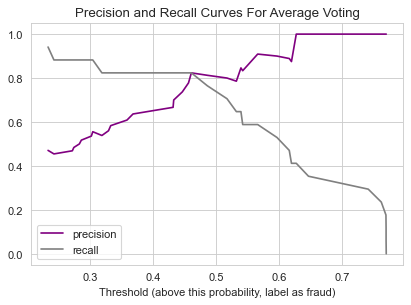

In [1191]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, voting_classifer.predict_proba(x_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision' , color='purple')
plt.plot(threshold_curve, recall_curve[1:], label='recall' , color ='gray')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves For Average Voting');

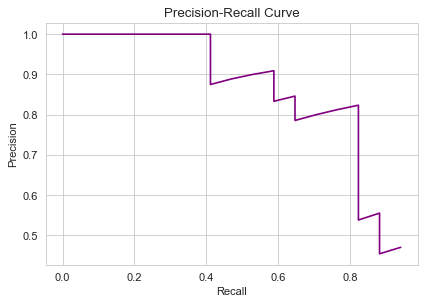

In [1192]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision' , color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

ROC AUC score =  0.9746732026143791


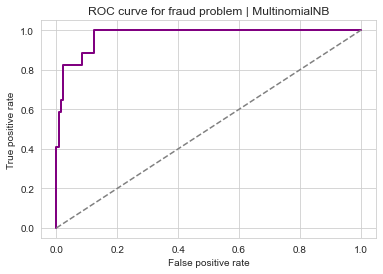

In [1193]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, voting_classifer.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr,lw=2, color='purple')
plt.plot([0,1],[0,1],c='gray',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem | MultinomialNB');
print("ROC AUC score = ", roc_auc_score(y_test, voting_classifer.predict_proba(x_test)[:,1]))

# --------------------------- Weighted Voting  

In [1194]:
weights = [1.5,3.8,4.2,2.2,1.3,4,2]
voting_classifer = VotingClassifier(estimators=list_all_model, voting='soft', weights = weights, n_jobs=-1)
voting_classifer.fit(x_train, y_train)
y_pred = voting_classifer.predict(x_test)
print('Classify by using Weighted Voting : ' , round(accuracy_score(y_test, y_pred),4))
voting_classifer.score(x_test,y_test)

Classify by using Weighted Voting :  0.9379


0.937888198757764

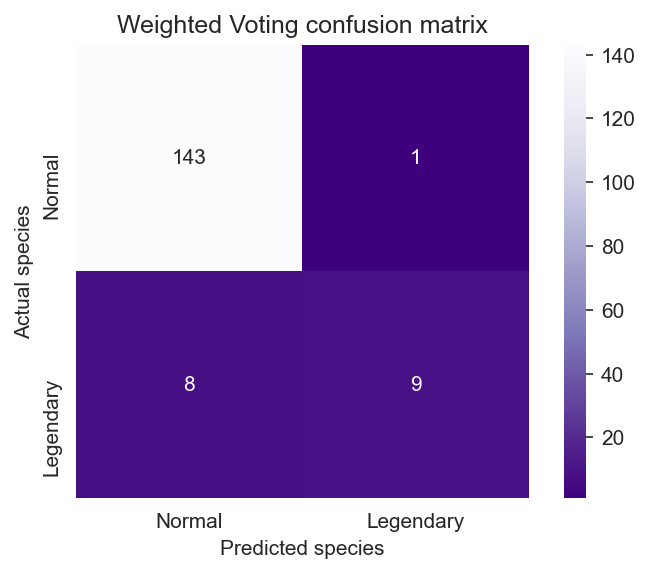

In [1195]:
# Print confusion matrix for BernoulliNB
voting_classifer.fit(x_train,y_train)
voting_classifer_confusion = confusion_matrix(y_test, voting_classifer.predict(x_test))
plt.figure(dpi=150)
sns.heatmap(voting_classifer_confusion, cmap=plt.cm.Purples_r, annot=True, square=True,xticklabels=class_lable, yticklabels=class_lable, fmt='g')
plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('Weighted Voting confusion matrix');

In [1196]:
voting_classifer_percision = round (precision_score(y_test,  voting_classifer.predict(x_test), average='macro', zero_division=1),4)
voting_classifer_recall = round (recall_score(y_test,  voting_classifer.predict(x_test), average='macro', zero_division=1),4)
F1 = round ((1)/((1/voting_classifer_percision)+(1/voting_classifer_recall)),4)
print('voting_classifer Score : ' , round(voting_classifer.score(x_test,y_test),4))
print('voting_classifer Precision : ',voting_classifer_percision)
print('voting_classifer Recall : ',voting_classifer_recall)
print('voting_classifer F1 : ', F1 )

voting_classifer Score :  0.9441
voting_classifer Precision :  0.9235
voting_classifer Recall :  0.7612
voting_classifer F1 :  0.4173


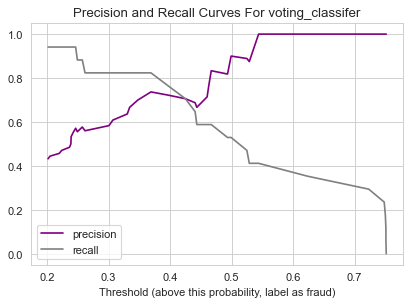

In [1197]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, voting_classifer.predict_proba(x_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision' , color='purple')
plt.plot(threshold_curve, recall_curve[1:], label='recall' , color ='gray')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves For voting_classifer');

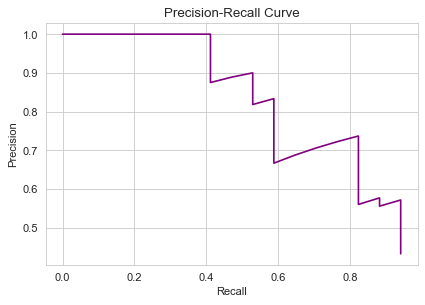

In [1198]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision' , color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

ROC AUC score =  0.9722222222222222


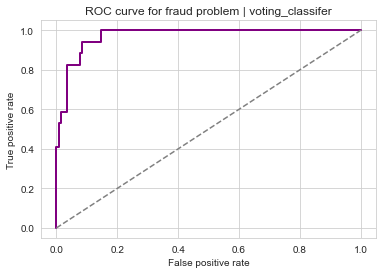

In [1199]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, voting_classifer.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr,lw=2, color='purple')
plt.plot([0,1],[0,1],c='gray',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem | voting_classifer');
print("ROC AUC score = ", roc_auc_score(y_test, voting_classifer.predict_proba(x_test)[:,1]))

# --------------------------- Stacking

In [1200]:
type_of_function = []
for i in list_all_model:
    type_of_function.append(i[1])
stacked = StackingClassifier(classifiers=type_of_function, meta_classifier=LogisticRegression(max_iter=1000), use_probas=False)
stacked.fit(x_train, y_train)
y_pred = stacked.predict(x_test)
print('Classify by using Stacking : ' , round(accuracy_score(y_test, y_pred),4))

Classify by using Stacking :  0.9627


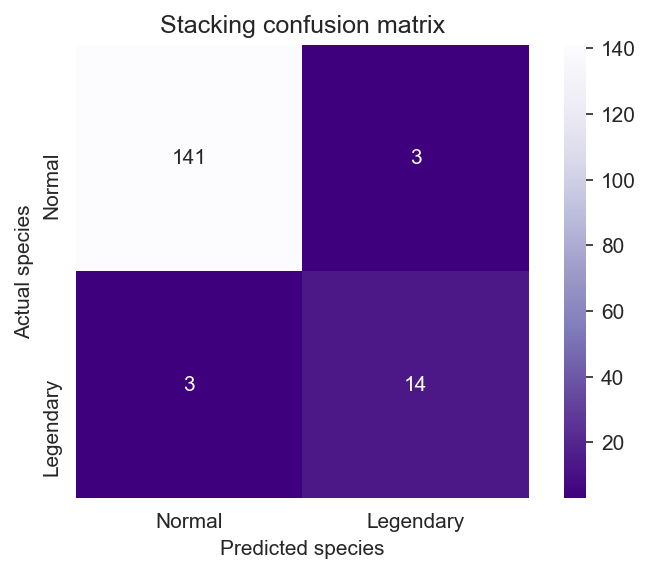

In [1201]:
# Print confusion matrix for BernoulliNB
stacked.fit(x_train,y_train)
stacked_confusion = confusion_matrix(y_test, stacked.predict(x_test))
plt.figure(dpi=150)
sns.heatmap(stacked_confusion, cmap=plt.cm.Purples_r, annot=True, square=True,xticklabels=class_lable, yticklabels=class_lable, fmt='g')
plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('Stacking confusion matrix');

In [1202]:
stacked_percision = round (precision_score(y_test,  stacked.predict(x_test), average='macro', zero_division=1),4)
stacked_recall = round (recall_score(y_test,  stacked.predict(x_test), average='macro', zero_division=1),4)
F1 = round ((1)/((1/stacked_percision)+(1/stacked_recall)),4)
print('Stacking Score : ' , round(stacked.score(x_test,y_test),4))
print('Stacking Precision : ',stacked_percision)
print('Stacking Recall : ',stacked_recall)
print('Stacking F1 : ', F1 )

Stacking Score :  0.9627
Stacking Precision :  0.9013
Stacking Recall :  0.9013
Stacking F1 :  0.4506


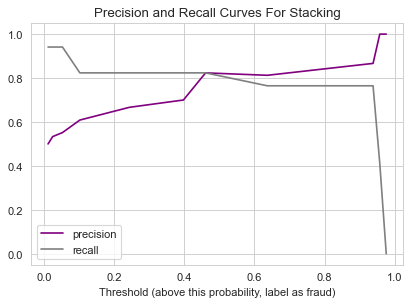

In [1203]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, stacked.predict_proba(x_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision' , color='purple')
plt.plot(threshold_curve, recall_curve[1:], label='recall' , color ='gray')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves For Stacking');

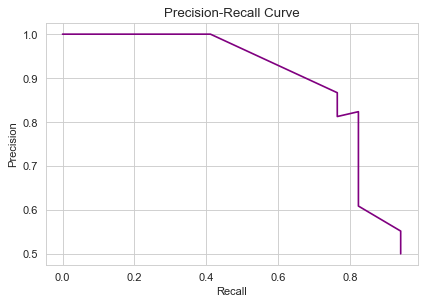

In [1204]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision' , color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

ROC AUC score =  0.9805964052287581


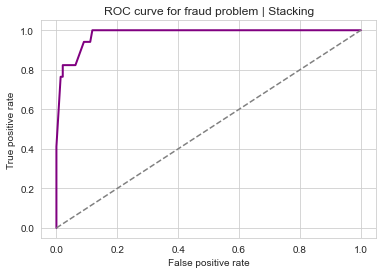

In [1205]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, stacked.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr,lw=2, color='purple')
plt.plot([0,1],[0,1],c='gray',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem | Stacking');
print("ROC AUC score = ", roc_auc_score(y_test, stacked.predict_proba(x_test)[:,1]))

# --------------------------- Gradient Boosting Machines

In [1206]:
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())
# ---------------------------
gbm = xgb.XGBRegressor( n_estimators=30000, max_depth=3, objective="reg:squarederror",  learning_rate=.1, subsample=1, min_child_weight=1,colsample_bytree=0.8)
x2_train, x_val, y2_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=2019)
eval_set=[(x2_train,y2_train),(x_val,y_val)] 
fit_model = gbm.fit(x_train, y_train, eval_set=eval_set, eval_metric='rmse', early_stopping_rounds=20,verbose=False )

In [1207]:
y_pred = gbm.predict(x_test, ntree_limit=gbm.best_ntree_limit)
print('Classify by using Gradient Boosting Machines : ' , round(rmse(y_test, y_pred),4))

Classify by using Gradient Boosting Machines :  0.2164


C:\Users\hanan\anaconda3\lib\site-packages\xgboost\core.py:101: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

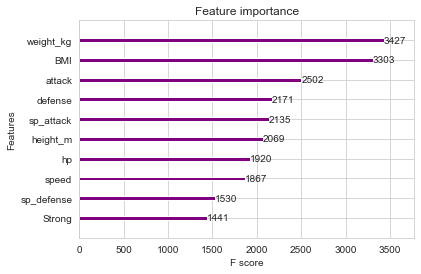

In [1208]:
xgb.plot_importance(gbm, color = 'purple')

# --------------------------- Support Vector Machines

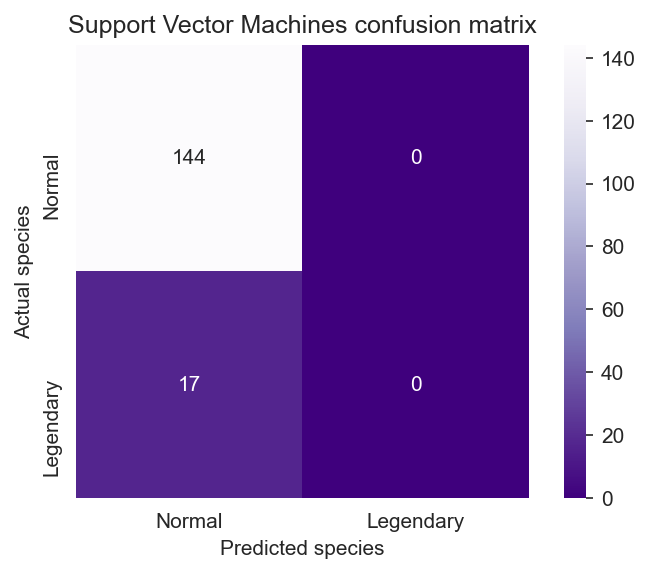

In [1209]:
svm_model = svm.SVC(kernel="poly" , probability=True)
svm_model.fit(x, y)
svm_confusion = confusion_matrix(y_test, svm_model.predict(x_test))
plt.figure(dpi=150)
sns.heatmap(svm_confusion, cmap=plt.cm.Purples_r, annot=True, square=True,xticklabels=class_lable, yticklabels=class_lable, fmt='g')
plt.xlabel('Predicted species')
plt.ylabel('Actual species')
plt.title('Support Vector Machines confusion matrix');

In [1210]:
svm_model_percision = round (precision_score(y_test,  svm_model.predict(x_test), average='macro', zero_division=1),4)
svm_model_recall = round (recall_score(y_test,  svm_model.predict(x_test), average='macro', zero_division=1),4)
F1 = round ((1)/((1/svm_model_percision)+(1/svm_model_recall)),4)
print('Support Vector Machines Score : ' , round(svm_model.score(x_test,y_test),4))
print('Support Vector Machines Precision : ',svm_model_percision)
print('Support Vector Machines Recall : ',svm_model_recall)
print('Support Vector Machines F1 : ', F1 )

Support Vector Machines Score :  0.8944
Support Vector Machines Precision :  0.9472
Support Vector Machines Recall :  0.5
Support Vector Machines F1 :  0.3273


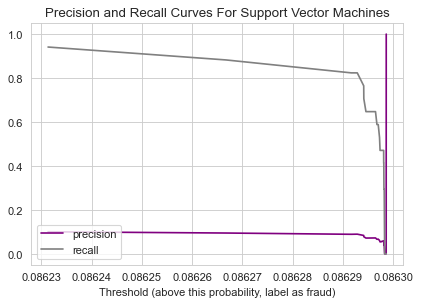

In [1211]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, svm_model.predict_proba(x_test)[:,1] )
plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision' , color='purple')
plt.plot(threshold_curve, recall_curve[1:], label='recall' , color ='gray')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves For Support Vector Machines');

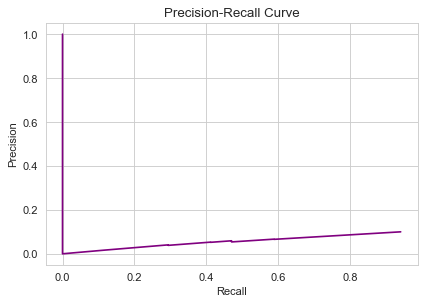

In [1212]:
plt.figure(dpi=80)
plt.plot(recall_curve[1:], precision_curve[1:],label='precision' , color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve");

ROC AUC score =  0.08415032679738563


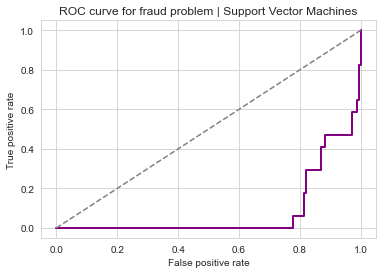

In [1213]:
# Precision = TP / (TP + FP)
# Recall = TP/P = True positive rate
# false positive rate = FP / true negatives = FP / (FP + TN) 

fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr,lw=2, color='purple')
plt.plot([0,1],[0,1],c='gray',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem | Support Vector Machines');
print("ROC AUC score = ", roc_auc_score(y_test, svm_model.predict_proba(x_test)[:,1]))